<a href="https://colab.research.google.com/github/mianshariq/Data_Viz/blob/main/My_Stock_Market_Data_Story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock market data Story


Questions we want to answer in this project is:
1. Are stocks performing better or Worse during COVID.
2. Has the risk of investing in stocks increased or decreased during COVID.
3. How is the certain stocks performaing compare to S&P500 ETF.

# Environment Set Up

In [4]:
#! pip install pandas_datareader

In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

# Data Collection

Gather stock data for Apple, Google, Microsoft and Amazon

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN', 'SPY', 'DAL']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 2,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

''' We have added SPY (S&P 500 ETF) and DAL (Delta Airlines) to my data and changed the years from past one to past 2 years'''
'''We choose 2 years, becasue like in the covid data set where we compared deaths and cases in neighboring states for
for an acurate comparison, we are doing the same here but instead of states, we are doing neighboring years of 2019 and 2020'''

'We choose 2 years, becasue like in the covid data set where we compared deaths and cases in neighboring states for\nfor an acurate comparison, we are doing the same here but instead of states, we are doing neighboring years of 2019 and 2020'

In [7]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-17,47.724998,46.689999,46.732498,47.250000,131516400.0,46.380230
2019-05-20,46.087502,45.070000,45.880001,45.772499,154449200.0,44.929932
2019-05-21,47.000000,46.174999,46.305000,46.650002,113459200.0,45.791275
2019-05-22,46.427502,45.637501,46.165001,45.695000,118994400.0,44.853859
2019-05-23,45.134998,44.452499,44.950001,44.915001,146118800.0,44.088215


In [8]:
SPY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-17,288.600006,285.119995,285.140015,285.839996,100353000.0,275.695190
2019-05-20,285.959991,283.119995,284.059998,283.950012,62877600.0,273.872345
2019-05-21,286.929993,285.549988,285.829987,286.510010,46847100.0,276.341431
2019-05-22,286.690002,285.100006,285.450012,285.630005,49482500.0,275.492676
2019-05-23,283.209991,280.570007,283.160004,282.140015,98733800.0,272.126526


# Exploratory Data Analysis (EDA)

## Visualize Data through Line and Scatter Plot

" Let's see a historical view of the adj closing price"

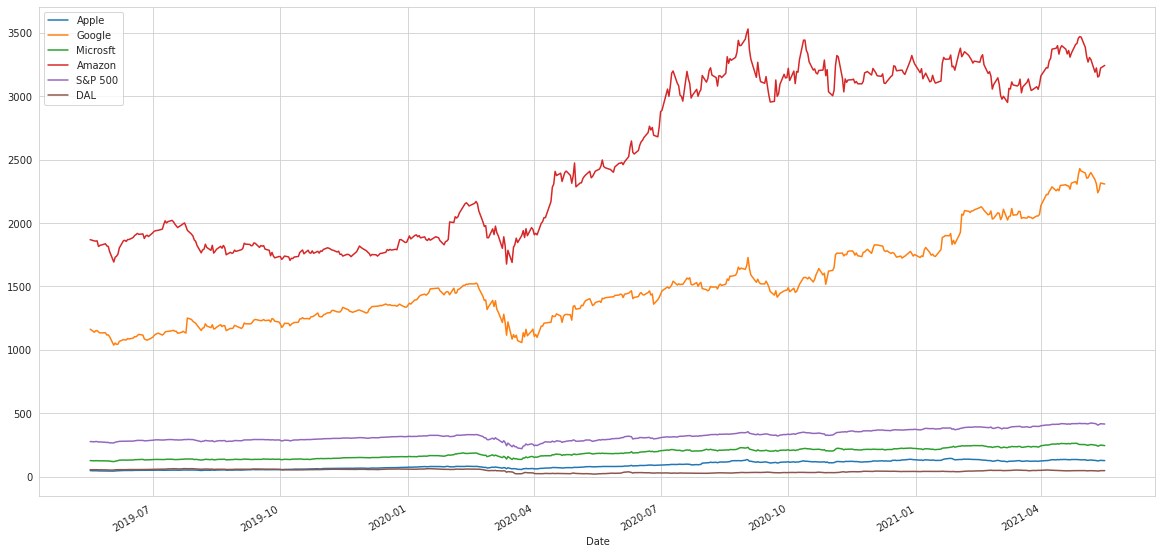

In [9]:
fig, ax=plt.subplots()
AAPL['Adj Close'].plot(legend=True,figsize=(20,10))
GOOG['Adj Close'].plot(legend=True,figsize=(20,10))
MSFT['Adj Close'].plot(legend=True,figsize=(20,10))
AMZN['Adj Close'].plot(legend=True,figsize=(20,10))
SPY['Adj Close'].plot(legend=True,figsize=(20,10))
DAL['Adj Close'].plot(legend=True,figsize=(20,10))
ax.legend(["Apple", "Google", "Microsft", "Amazon", "S&P 500", "DAL"])
sns.set()

''' Let's see a historical view of the adj closing price'''

##Converting Adj Close price to Percent Change

In [10]:
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()
GOOG['Daily Return']= GOOG['Adj Close'].pct_change()
MSFT['Daily Return']= MSFT['Adj Close'].pct_change()
AMZN['Daily Return']= AMZN['Adj Close'].pct_change()
SPY['Daily Return']= SPY['Adj Close'].pct_change()
DAL['Daily Return']= DAL['Adj Close'].pct_change()

''' Here We am converting Daily Returns values into percentage change'''

' Here We am converting Daily Returns values into percentage change'

'We created a scatter plot which shows the different stocks and their returns over the two years.'

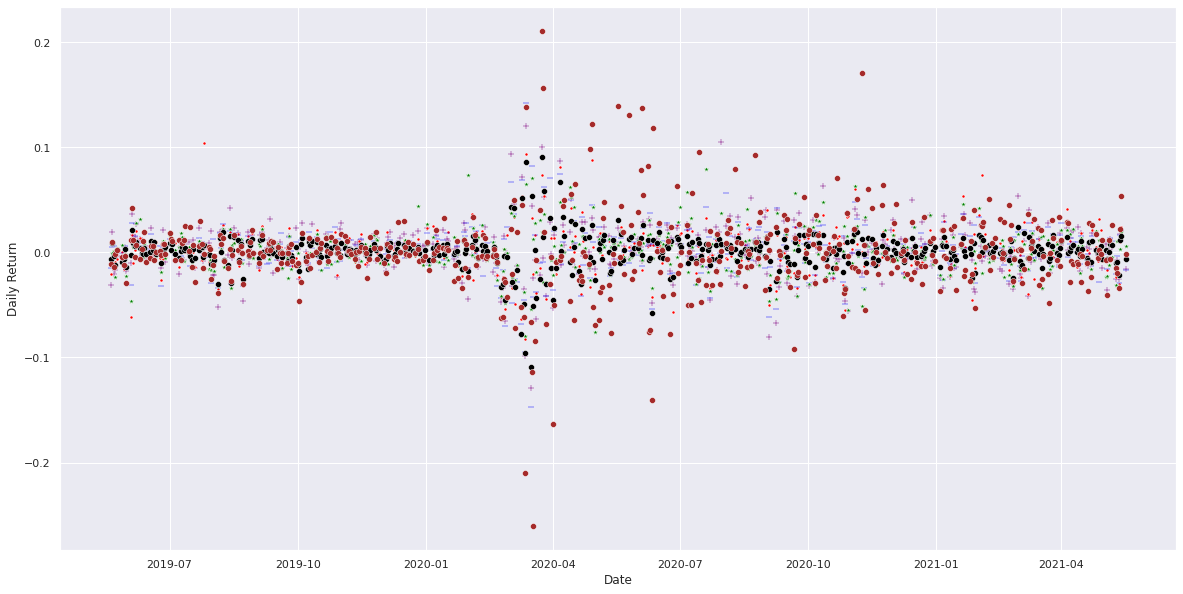

In [58]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=AAPL.index, y=AAPL['Daily Return'], color="Purple",marker='+')
sns.scatterplot(x=GOOG.index, y=GOOG['Daily Return'], color="Red", marker='.')
sns.scatterplot(x=MSFT.index, y=MSFT['Daily Return'], color="Blue", marker='_')
sns.scatterplot(x=AMZN.index, y=AMZN['Daily Return'], color="Green", marker='*')
sns.scatterplot(x=SPY.index, y=SPY['Daily Return'], color="Black", marker='o')
sns.scatterplot(x=DAL.index, y=DAL['Daily Return'], color="Brown", marker='o')
ax.legend(["Apple", "Google", "Microsft", "Amazon", "S&P 500", "DAL"])
'''We created a scatter plot which shows the different stocks and their returns over the two years.'''

"Then we'll plot the daily return percentage. Here we are adding Aapl and SPY as lines and the remainding as scatter plot"

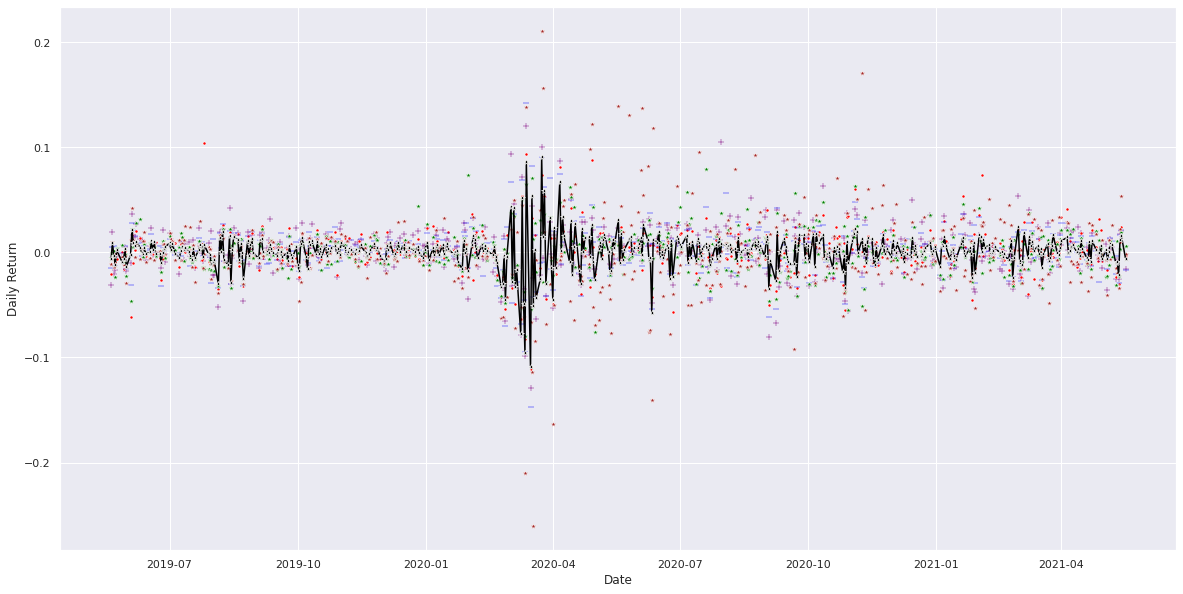

#Analysis

##Spliting 2019 and 2020 from Data

In [14]:
AAPL_Pre= AAPL.loc['2016':'2019']
AAPL_Post= AAPL.loc['2020']
GOOG_Pre= GOOG.loc['2016':'2019']
GOOG_Post= GOOG.loc['2020']
MSFT_Pre= MSFT.loc['2016':'2019']
MSFT_Post= MSFT.loc['2020']
AMZN_Pre= AMZN.loc['2016':'2019']
AMZN_Post= AMZN.loc['2020']
SPY_Pre= SPY.loc['2016':'2019']
SPY_Post= SPY.loc['2020']
DAL_Pre= SPY.loc['2016':'2019']
DAL_Post= SPY.loc['2020']
''' To show the difference in previous year data and covid data, first we need to split the data through 2019 and 2020. 
We have 2016: to 2019 these in case we need to go back and shows the data from past five years. we stayed with one 
becasue it would be an year to year comaprison.'''

' To show the difference in previous year data and covid data, first we need to split the data through 2019 and 2020. \nWe have 2016: to 2019 these in case we need to go back and shows the data from past five years. we stayed with one \nbecasue it would be an year to year comaprison.'

APPL = Yellow
GOOG = Green


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'We are comparing the hsitogram. We can see GOOG had higher returns towards the mean'

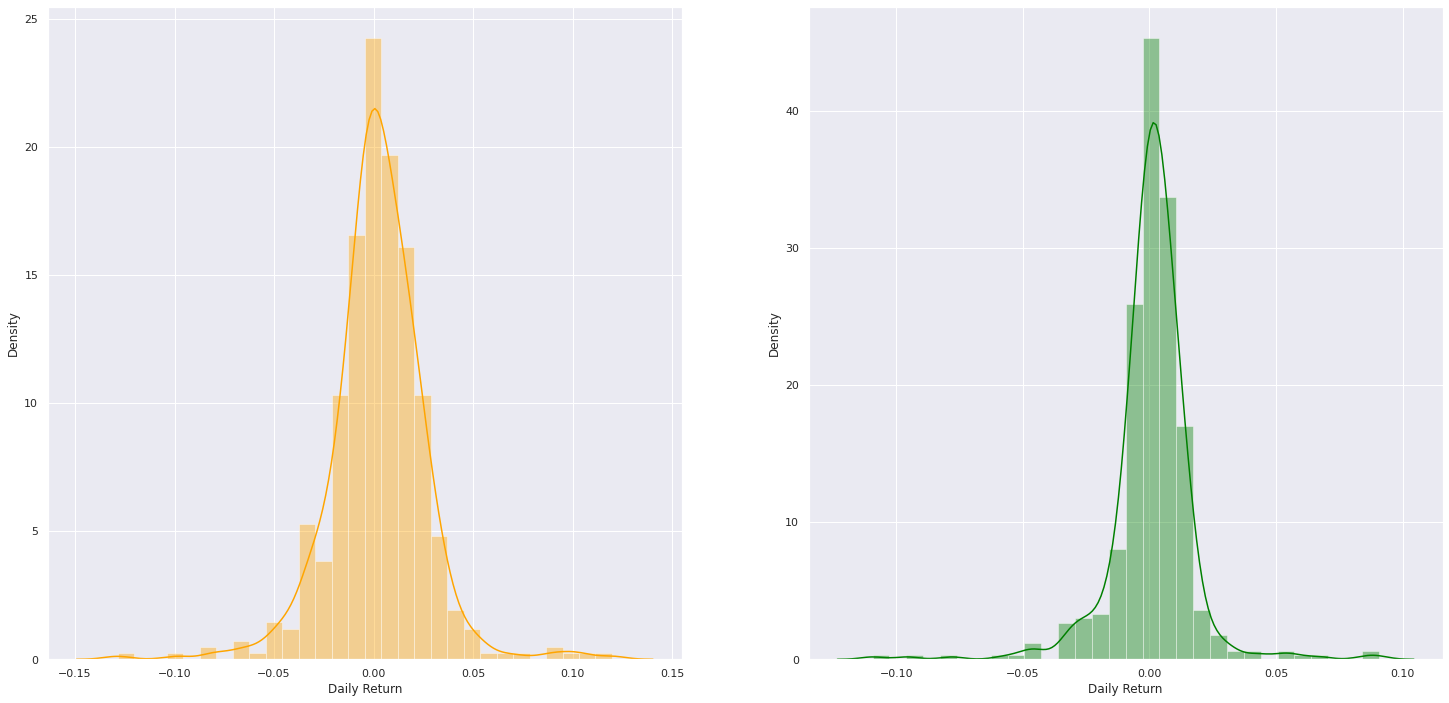

In [15]:
#We will show different histograms to show how the distribution of the data is.
#We can see they are closely related to a normal distributuion.
#Here we have data for both years.
plt.figure(figsize=(25,12))
plt.subplot(1, 2, 1)
sns.distplot(AAPL['Daily Return'].dropna(),bins=30,color='Orange')

plt.subplot(1, 2, 2)
sns.distplot(SPY['Daily Return'].dropna(),bins=30,color='Green')

sns.set()
print("APPL = Yellow")
print("GOOG = Green")
'''We are comparing the hsitogram. We can see GOOG had higher returns towards the mean'''

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MSFT = Purple
SPY = Black


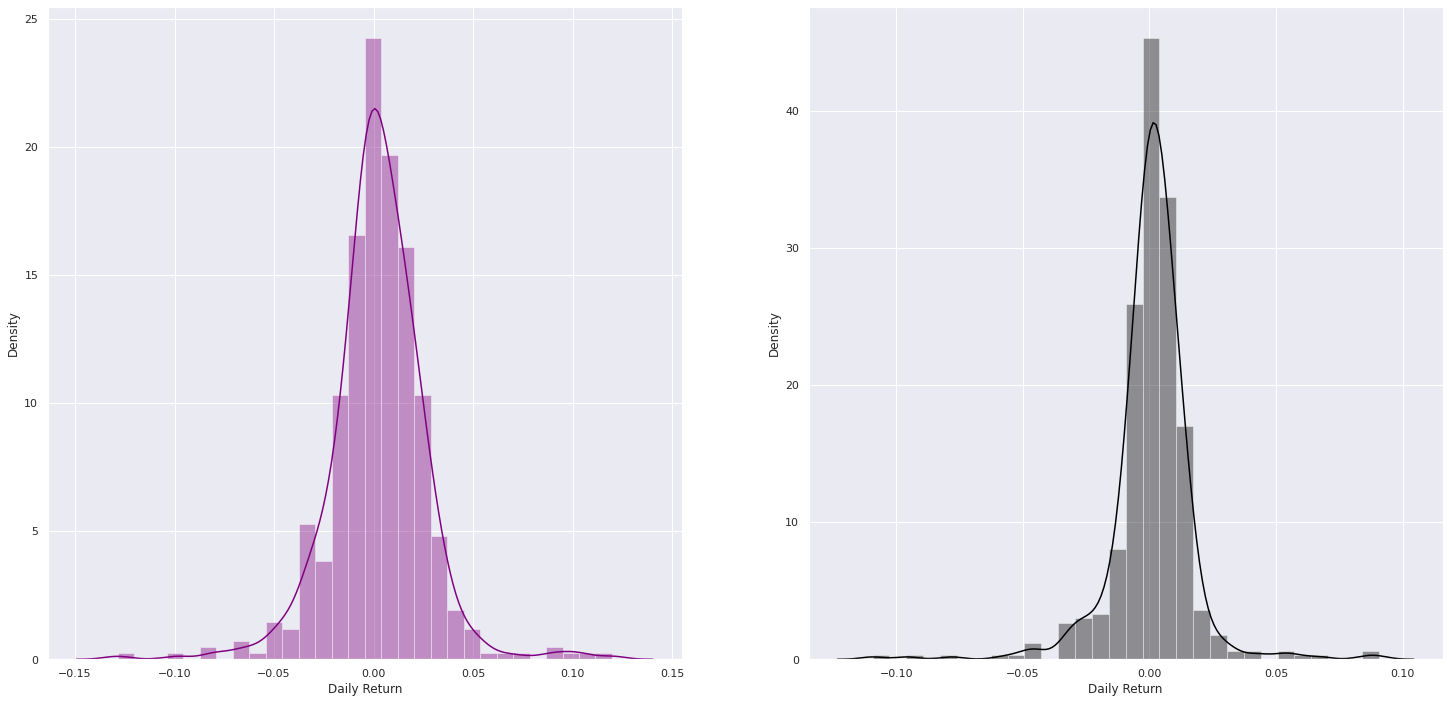

In [16]:
plt.figure(figsize=(25,12))
plt.subplot(1, 2, 1)
sns.distplot(AAPL['Daily Return'].dropna(),bins=30,color='Purple')

plt.subplot(1, 2, 2)
sns.distplot(SPY['Daily Return'].dropna(),bins=30,color='Black')

sns.set()
print("MSFT = Purple")
print("SPY = Black")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


SPY = Black
DAL = Brown


'We are comparing the hsitogram. We can see GOOG had higher returns towards the mean'

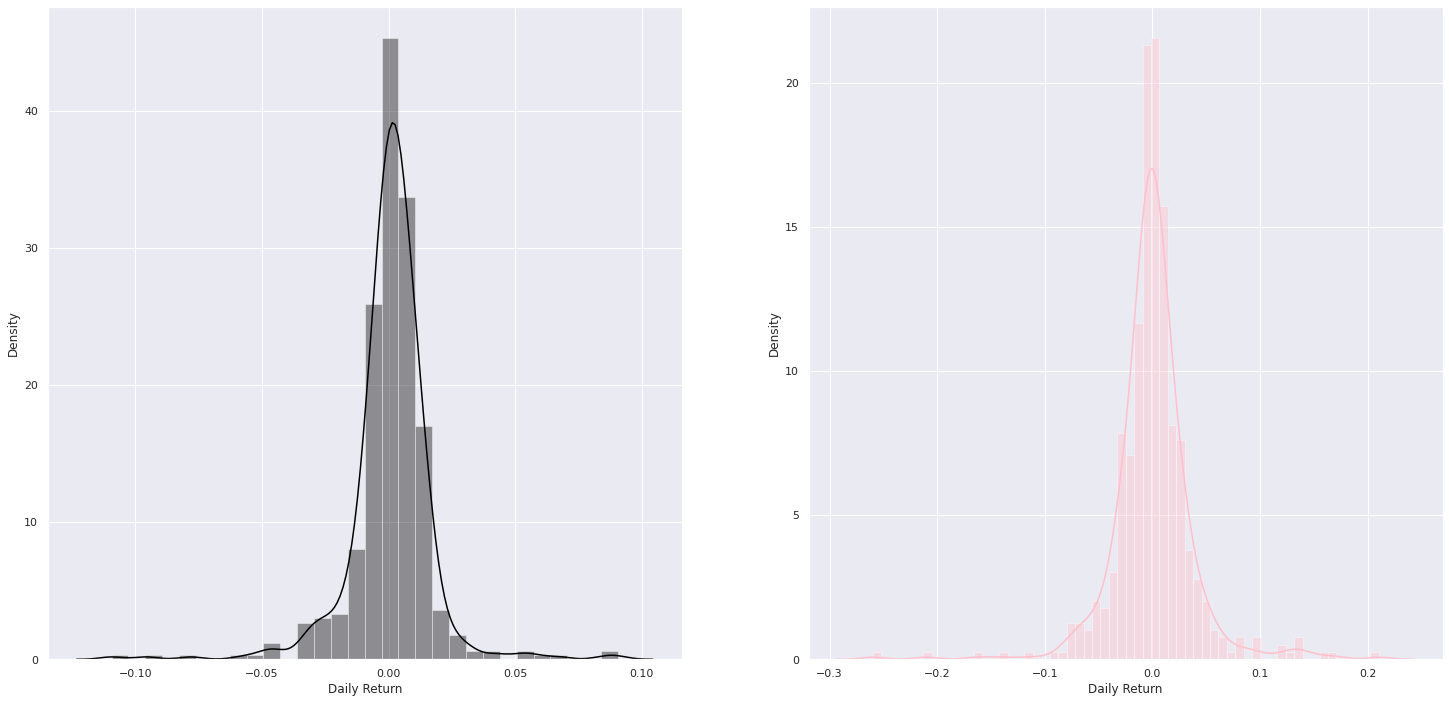

In [17]:
plt.figure(figsize=(25,12))
plt.subplot(1, 2, 1)
sns.distplot(SPY['Daily Return'].dropna(),bins=30,color='Black')

plt.subplot(1, 2, 2)
sns.distplot(DAL['Daily Return'].dropna(),bins=60,color='Pink')

sns.set()
print("SPY = Black")
print("DAL = Brown")
'''We are comparing the hsitogram. We can see GOOG had higher returns towards the mean'''

## Normalization and Standarization

'One of the issue is the scale of the stocks prices\nso we Standarize the data to have a better view of the data. Since the price for Amazon and Apple are way higher than the other'

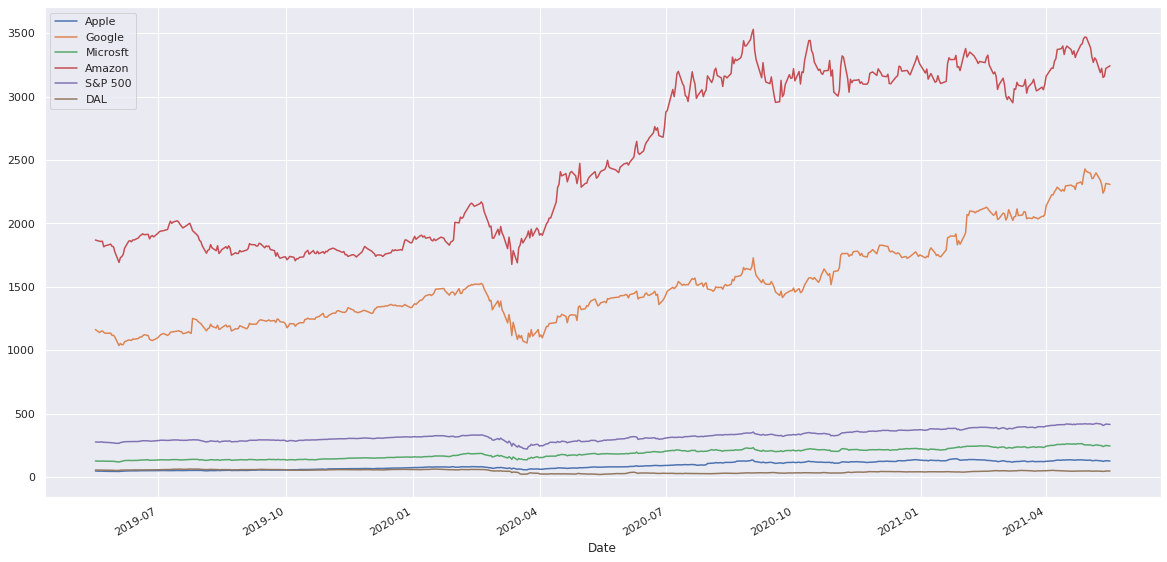

In [18]:
fig, ax=plt.subplots()
ax.legend(["Apple", "Google", "Microsft", "Amazon", "S&P 500"])
AAPL['Adj Close'].plot(legend=True,figsize=(20,10), ax=ax)
GOOG['Adj Close'].plot(legend=True,figsize=(20,10), ax=ax)
MSFT['Adj Close'].plot(legend=True,figsize=(20,10), ax=ax)
AMZN['Adj Close'].plot(legend=True,figsize=(20,10), ax=ax)
SPY['Adj Close'].plot(legend=True,figsize=(20,10), ax=ax)
DAL['Adj Close'].plot(legend=True,figsize=(20,10), ax=ax)
ax.legend(["Apple", "Google", "Microsft", "Amazon", "S&P 500", "DAL"])
sns.set()
'''One of the issue is the scale of the stocks prices
so we Standarize the data to have a better view of the data. Since the price for Amazon and Apple are way higher than the other''' 


In [19]:
'''Here I am standarizing the data in order to have the stocks scalable agianst each other since the price are different'''
AAPL['Adj Close']=(AAPL['Adj Close']-min(AAPL['Adj Close']))/(max(AAPL['Adj Close'])-min(AAPL['Adj Close']))
GOOG['Adj Close']=(GOOG['Adj Close']-min(GOOG['Adj Close']))/(max(GOOG['Adj Close'])-min(GOOG['Adj Close']))
MSFT['Adj Close']=(MSFT['Adj Close']-min(MSFT['Adj Close']))/(max(MSFT['Adj Close'])-min(MSFT['Adj Close']))
AMZN['Adj Close']=(AMZN['Adj Close']-min(AMZN['Adj Close']))/(max(AMZN['Adj Close'])-min(AMZN['Adj Close']))
SPY['Adj Close']=(SPY['Adj Close']-min(SPY['Adj Close']))/(max(SPY['Adj Close'])-min(SPY['Adj Close']))
DAL['Adj Close']=(DAL['Adj Close']-min(DAL['Adj Close']))/(max(DAL['Adj Close'])-min(DAL['Adj Close']))

APPL = Purple
GOOG = Red
MSFT = Orange
AMZN = Green
SPY = Black
DAL = Brown


'After standarizing the data we have a better scale of how each stock performance against the other'

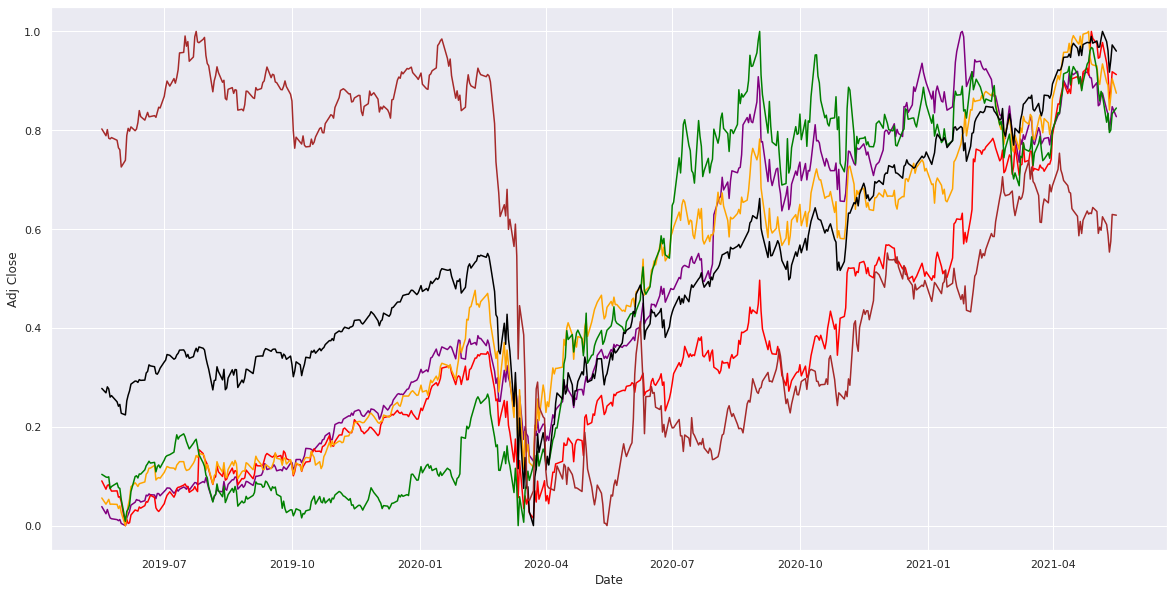

In [38]:
plt.figure(figsize=(20,10))
sns.lineplot(x=AAPL.index, y=AAPL['Adj Close'], color="Purple")
sns.lineplot(x=GOOG.index, y=GOOG['Adj Close'], color="Red")
sns.lineplot(x=MSFT.index, y=MSFT['Adj Close'], color="Orange")
sns.lineplot(x=AMZN.index, y=AMZN['Adj Close'], color="Green")
sns.lineplot(x=SPY.index, y=SPY['Adj Close'], color="Black")
sns.lineplot(x=DAL.index, y=DAL['Adj Close'], color="Brown")
ax.legend(["Apple", "Google", "Microsft", "Amazon", "S&P 500", "DAL"])

print("APPL = Purple")
print("GOOG = Red")
print("MSFT = Orange")
print("AMZN = Green")
print("SPY = Black")
print("DAL = Brown")
'''After standarizing the data we have a better scale of how each stock performance against the other'''

APPL = Purple
GOOG = Red
MSFT = Orange
AMZN = Green
SPY = Black
DAL = Brown


'Here we created two plots to show my performace of each stock in 2019 to the left and 2020 (COVID year) on the right.\nYou can see that 2019 was stable year and here was lack of volitality'

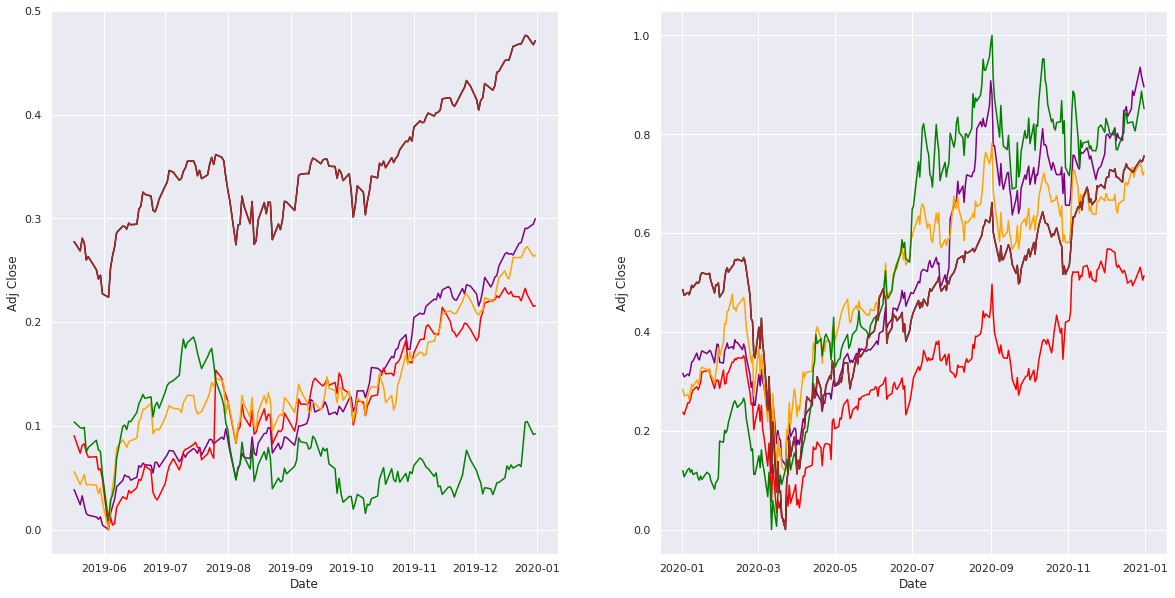

In [21]:
AAPL_Pre= AAPL.loc['2016':'2019']
AAPL_Post= AAPL.loc['2020']
GOOG_Pre= GOOG.loc['2016':'2019']
GOOG_Post= GOOG.loc['2020']
MSFT_Pre= MSFT.loc['2016':'2019']
MSFT_Post= MSFT.loc['2020']
AMZN_Pre= AMZN.loc['2016':'2019']
AMZN_Post= AMZN.loc['2020']
SPY_Pre= SPY.loc['2016':'2019']
SPY_Post= SPY.loc['2020']

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.lineplot(x=AAPL_Pre.index, y=AAPL_Pre['Adj Close'], color="Purple")
sns.lineplot(x=GOOG_Pre.index, y=GOOG_Pre['Adj Close'], color="Red")
sns.lineplot(x=MSFT_Pre.index, y=MSFT_Pre['Adj Close'], color="Orange")
sns.lineplot(x=AMZN_Pre.index, y=AMZN_Pre['Adj Close'], color="Green")
sns.lineplot(x=SPY_Pre.index, y=SPY_Pre['Adj Close'], color="Black")
sns.lineplot(x=DAL_Pre.index, y=DAL_Pre['Adj Close'], color="Brown")

plt.subplot(1, 2, 2)
sns.lineplot(x=AAPL_Post.index, y=AAPL_Post['Adj Close'], color="Purple")
sns.lineplot(x=GOOG_Post.index, y=GOOG_Post['Adj Close'], color="Red")
sns.lineplot(x=MSFT_Post.index, y=MSFT_Post['Adj Close'], color="Orange")
sns.lineplot(x=AMZN_Post.index, y=AMZN_Post['Adj Close'], color="Green")
sns.lineplot(x=SPY_Post.index, y=SPY_Post['Adj Close'], color="Black")
sns.lineplot(x=DAL_Post.index, y=DAL_Post['Adj Close'], color="Brown")

print("APPL = Purple")
print("GOOG = Red")
print("MSFT = Orange")
print("AMZN = Green")
print("SPY = Black")
print("DAL = Brown")
'''Here we created two plots to show my performace of each stock in 2019 to the left and 2020 (COVID year) on the right.
You can see that 2019 was stable year and here was lack of volitality'''

## Binning Returns

In [22]:
'''Here I am creating bins based on percentage to compare different returns'''
AAPL[['Daily Return_Bin']]=pd.cut(AAPL['Daily Return'], bins=[-.12,-.09,-.06,-.03,.000,.03,.06,.09,.12,.15], include_lowest=True, labels=['<12 %','-09 to -6 %','-6 to -3 %','-3 to 0 %','0 to 3%','3 to 6 %','6 to 9 %', '9 to 12%','>12%'])
GOOG[['Daily Return_Bin']]=pd.cut(GOOG['Daily Return'], bins=[-.12,-.09,-.06,-.03,.000,.03,.06,.09,.12,.15], include_lowest=True, labels=['<12 %','-09 to -6 %','-6 to -3 %','-3 to 0 %','0 to 3%','3 to 6 %','6 to 9 %', '9 to 12%','>12%'])
MSFT[['Daily Return_Bin']]=pd.cut(MSFT['Daily Return'], bins=[-.12,-.09,-.06,-.03,.000,.03,.06,.09,.12,.15], include_lowest=True, labels=['<12 %','-09 to -6 %','-6 to -3 %','-3 to 0 %','0 to 3%','3 to 6 %','6 to 9 %', '9 to 12%','>12%'])
AMZN[['Daily Return_Bin']]=pd.cut(AMZN['Daily Return'], bins=[-.12,-.09,-.06,-.03,.000,.03,.06,.09,.12,.15], include_lowest=True, labels=['<12 %','-09 to -6 %','-6 to -3 %','-3 to 0 %','0 to 3%','3 to 6 %','6 to 9 %', '9 to 12%','>12%'])
SPY[['Daily Return_Bin']]=pd.cut(SPY['Daily Return'], bins=[-.15,-.10,-.05,.000,.05,.10,.15,.20], include_lowest=True, labels=['<-11 %','-10 to -6 %','-5 to 0 %','0-5 %', '6-10 %', '11-15 %','> 15%'])

In [23]:
'''We can see new Daily Return Bin'''
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return,Daily Return_Bin
Date,,,,,,,,
2019-05-17,1180.150024,1160.010010,1168.469971,1162.300049,1208600,0.090460,NaN,NaN
2019-05-20,1146.796997,1131.442993,1144.500000,1138.849976,1353300,0.073633,-0.020176,-3 to 0 %
2019-05-21,1152.708008,1137.939941,1148.489990,1149.630005,1159800,0.081369,0.009466,0 to 3%
2019-05-22,1158.520020,1145.890015,1146.750000,1151.420044,914500,0.082653,0.001557,0 to 3%
2019-05-23,1145.973022,1129.223999,1140.500000,1140.770020,1198900,0.075011,-0.009249,-3 to 0 %


In [24]:
'''importing the dates to my data again.'''
AAPL_Pre= AAPL.loc['2016':'2019']
AAPL_Post= AAPL.loc['2020']
GOOG_Pre= GOOG.loc['2016':'2019']
GOOG_Post= GOOG.loc['2020']
MSFT_Pre= MSFT.loc['2016':'2019']
MSFT_Post= MSFT.loc['2020']
AMZN_Pre= AMZN.loc['2016':'2019']
AMZN_Post= AMZN.loc['2020']
SPY_Pre= SPY.loc['2016':'2019']
SPY_Post= SPY.loc['2020']
DAL_Pre= SPY.loc['2016':'2019']
DAL_Post= SPY.loc['2020']

In [25]:
'''Here we are adding the vounts for Daily % and then summing them up'''
a=AAPL["Daily Return_Bin"].value_counts()
b=GOOG["Daily Return_Bin"].value_counts()
c=MSFT["Daily Return_Bin"].value_counts()
d=AMZN["Daily Return_Bin"].value_counts()
e=a+b+c+d
print(e)

<12 %            3
-09 to -6 %     13
-6 to -3 %      98
-3 to 0 %      786
0 to 3%        989
3 to 6 %        94
6 to 9 %        19
9 to 12%         7
>12%             1
Name: Daily Return_Bin, dtype: int64


In [26]:
#  days with 0-3 %
print("Days with 0-3% "+ str(1009/2016 *100))

Days with 0-3% 50.04960317460318


In [27]:
#  days with greater than 6 % 
print("Days with returns greater than 6% "+ str((18+7+1)/2016 * 100))

Days with returns greater than 6% 1.2896825396825395


In [28]:
#  days with greater than 3 % 
print("Days with returns greater than 3% "+ str((92+18+7+1)/2016 * 100))

Days with returns greater than 3% 5.853174603174603


In [29]:
#days with negative returns
(775+91+14+3)/2016 *100

43.79960317460318

' We are plotting Pre Covid vs Post Coviid Returns for Apple'

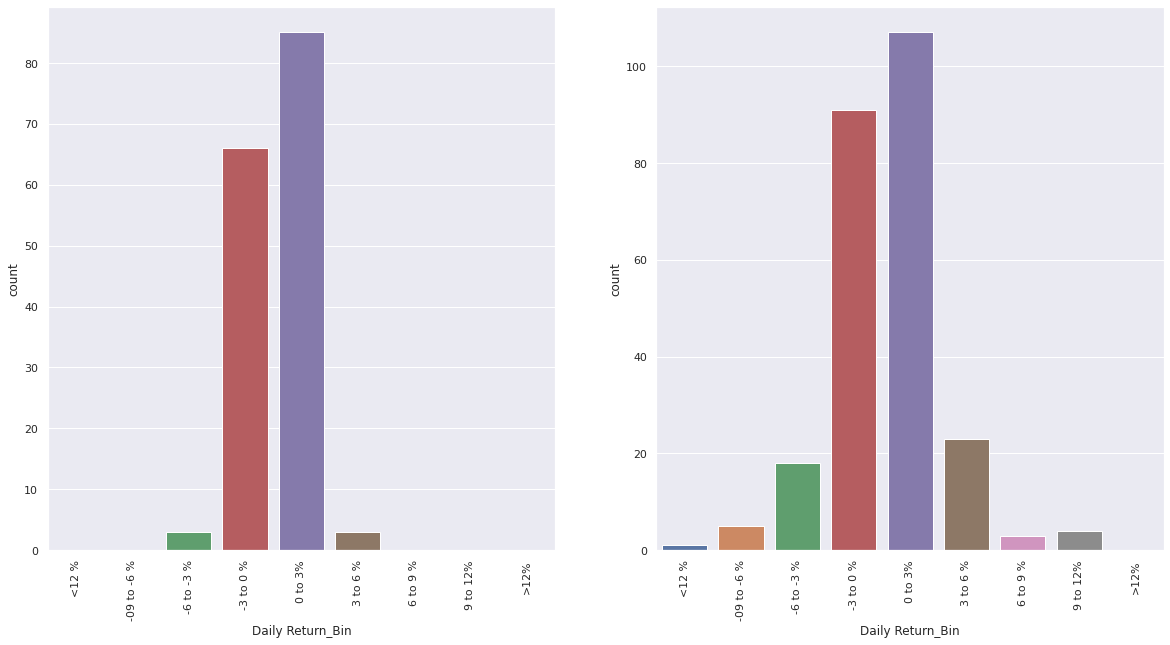

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(x="Daily Return_Bin", data=AAPL_Pre)
plt.xticks(rotation="90")

plt.subplot(1, 2, 2)

sns.countplot(x="Daily Return_Bin", data=AAPL_Post)
plt.xticks(rotation="90")

''' We are plotting Pre Covid vs Post Coviid Returns for Apple'''

' We are plotting Pre Covid vs Post Coviid Returns for S&P500'

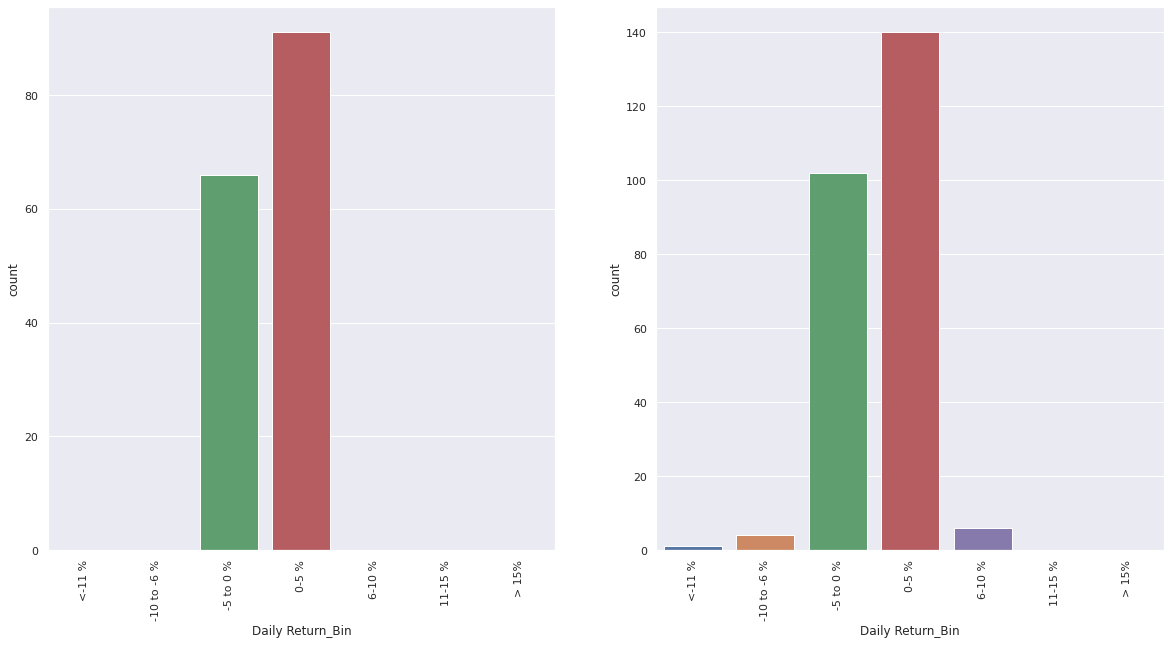

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(x="Daily Return_Bin", data=SPY_Pre)
plt.xticks(rotation="90")

plt.subplot(1, 2, 2)

sns.countplot(x="Daily Return_Bin", data=SPY_Post)
plt.xticks(rotation="90")
''' We are plotting Pre Covid vs Post Coviid Returns for S&P500'''

' We are plotting Pre Covid vs Post COVID Returns for DAL'

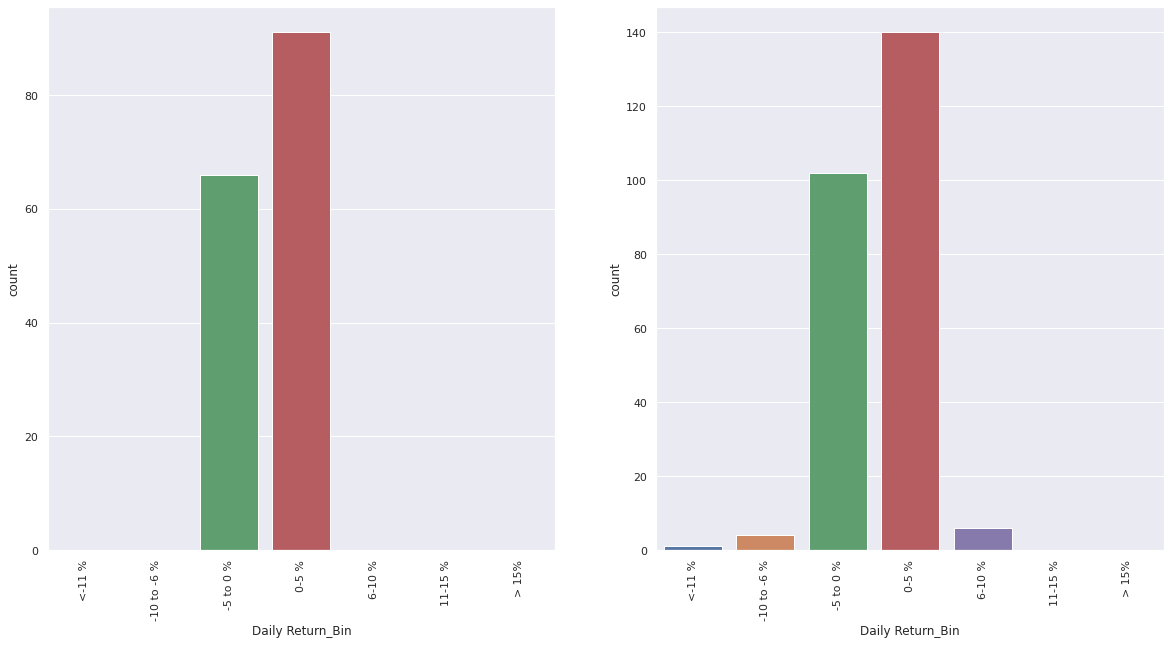

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(x="Daily Return_Bin", data=DAL_Pre)
plt.xticks(rotation="90")

plt.subplot(1, 2, 2)

sns.countplot(x="Daily Return_Bin", data=DAL_Post)
plt.xticks(rotation="90")
''' We are plotting Pre Covid vs Post COVID Returns for DAL'''

In [33]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN','SPY', 'DAL'],'yahoo',start,end)['Adj Close']
# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,SPY,DAL
Date,,,,,,
2019-05-17,46.380230,1162.300049,125.589317,1869.000000,275.695190,53.765648
2019-05-20,44.929932,1138.849976,123.775154,1858.969971,273.872345,53.168140
2019-05-21,45.791275,1149.630005,124.441994,1857.520020,276.341431,53.706875
2019-05-22,44.853859,1151.420044,125.197060,1859.680054,275.492676,52.952648
2019-05-23,44.088215,1140.770020,123.735931,1815.479980,272.126526,52.893879


In [34]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

Showing relationship between stocks and SPY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


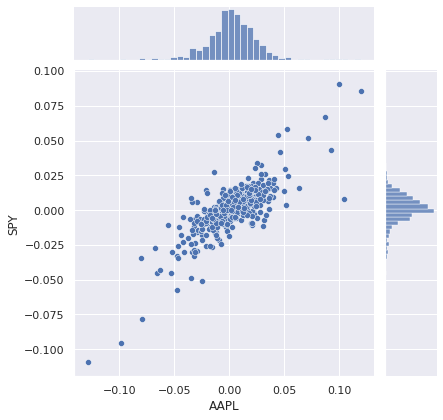

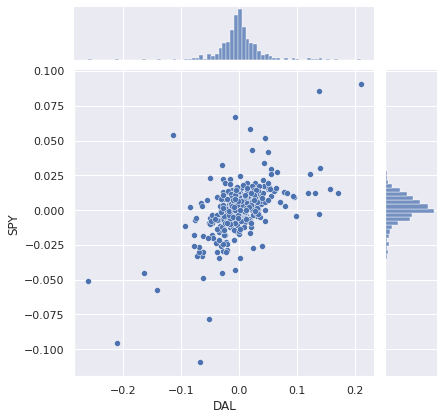

In [35]:
# We'll use joinplot to compare the daily returns of Apple vs S&P500 as  well as SPY vs DAL.
sns.jointplot('AAPL','SPY',tech_rets,kind='scatter')
sns.jointplot('DAL','SPY',tech_rets,kind='scatter')

## Risk for Each Stock Pre and Post Covid

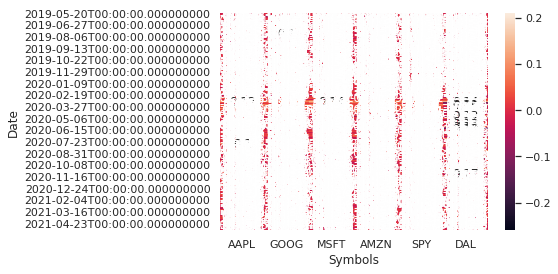

In [36]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna(),annot=True)

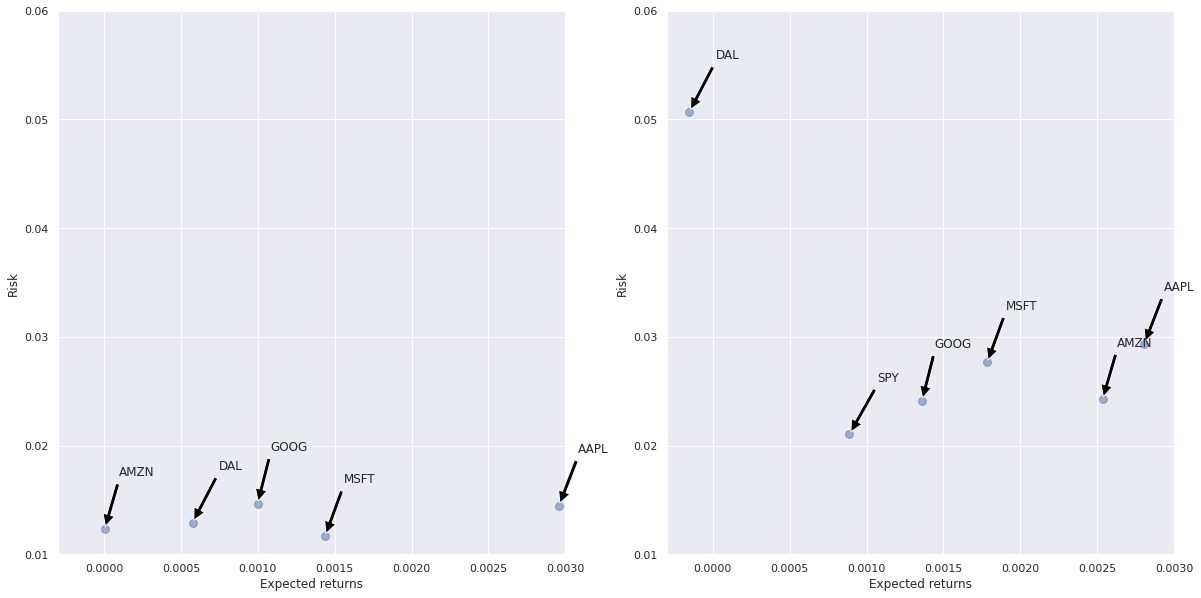

In [47]:
plt.figure(figsize=(20,10))
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()
rets_Pre= rets.loc['2016':'2019']
rets_Post= rets.loc['2020']
plt.subplot(1, 2, 1)
area = np.pi*20

plt.scatter(rets_Pre.mean(), rets_Pre.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.060])
plt.xlim([-.0003,0.0030])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets_Pre.columns, rets_Pre.mean(), rets_Pre.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black', shrink=0.05)
        # arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
        )
plt.subplot(1, 2, 2)
area = np.pi*20

plt.scatter(rets_Post.mean(), rets_Post.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.060])
plt.xlim([-.0003,.0030])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets_Post.columns, rets_Post.mean(), rets_Post.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black', shrink=0.05)
        # arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
        )

#Conclusion

We can clearly see the affect of COVID on stocks. Here we only looked at 6 stocks which some are very highly correlated. And one DAL which is not highly correlated.
Furthermore, based on Risk vs Expected Returns we can see a big change in the risk levels for GOOGLE, MICROSOFT and AMAZON and a very negative change for Delta Airlines.

It is interesting to see that all the tech companies retuns increased during covid. While SPY (S&P 500) didnt or decreased. This shows that many of the S&P 500 had losses however some of the loses were negated by the high returns of these 4 stocks which accounts for 20% of the S&P 500 by weight.

Post COVID, We can see that airlines(DAL) is struggling with COVID and is a high risk stock due to the voliatility. We can see that retuern have been in the negative Post COVID.

If we were to invest as a Risk Averse person, Amazon seems like a safer bet after covid as it has low risk and high returns.

Lastly, As Technology provided a way for people to meet, work, shop, and entertain themselves from their homes. As a result, people scarcely leave their homes and as a result, tech adoption soared as you can see from the dip in the tech stocks in March and then a high performance after. As people get used to this new normal, the trend could continue well past the pandemic.